Required packages

In [252]:
#Loading required packages
import requests
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt

Data download

In [253]:
# Load the Excel file, specifying the header rows
file_path = 'Historisk Index data.xlsx'
df = pd.read_excel(file_path, header=[2])

# Display the loaded DataFrame
# Juster displayindstillingerne
pd.set_option('display.max_columns', None)  # Vis alle kolonner
pd.set_option('display.expand_frame_repr', False)  # Forhindr brud på linjer
pd.set_option('display.max_colwidth', None)  # Vis fulde kolonnebredder
print(df.head())


       Dates  Danmark    USA  England  Tyskland  Frankrig  Italien  Spanien  Holland  Sverige  SCHWEIZ  Finland  Belgien  Østrig  Portugal  Grækenland  Irland  Luxembourg  TJEKKIET  POLAN  UNGARN  NORWAY
0 1927-12-30      NaN  17.66      NaN       NaN       NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN     NaN       NaN         NaN     NaN         NaN       NaN    NaN     NaN     NaN
1 1928-01-02      NaN  17.66      NaN       NaN       NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN     NaN       NaN         NaN     NaN         NaN       NaN    NaN     NaN     NaN
2 1928-01-03      NaN  17.76      NaN       NaN       NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN     NaN       NaN         NaN     NaN         NaN       NaN    NaN     NaN     NaN
3 1928-01-04      NaN  17.72      NaN       NaN       NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN     NaN       NaN         NaN     NaN         NaN       NaN    

Election data

In [254]:
# Define election dates DK
DK_election_dates = [
    '1984-01-10',  # 1984 election (Blå)
    '1987-09-08',  # 1987 election (Blå)
    '1988-05-10',  # 1988 election (Blå)
    '1990-12-12',  # 1990 election (Blå)
    '1994-09-21',  # 1994 election (Rød)
    '1998-03-11',  # 1998 election (Rød)
    '2001-11-20',  # 2001 election (Blå)
    '2005-02-08',  # 2005 election (Blå)
    '2007-11-13',  # 2007 election (Blå)
    '2011-09-15',  # 2011 election (Rød)
    '2015-06-18',  # 2015 election (Blå)
    '2019-06-05',  # 2019 election (Rød)
    '2022-11-01'   # 2022 election (Rød)
]

# Convert election dates to datetime objects
DK_election_dates = pd.to_datetime(DK_election_dates)

# Create a list to define the periods of "Rød" and "Blå"
DK_periods = [
    ('1984-01-10', '1987-09-07', 'Blå'),  # Post-1984 election
    ('1987-09-08', '1988-05-09', 'Blå'),  # Post-1987 election
    ('1988-05-10', '1990-12-11', 'Blå'),  # Post-1988 election
    ('1990-12-12', '1994-09-20', 'Blå'),  # Post-1990 election
    ('1994-09-21', '2001-11-19', 'Rød'),  # Post-1994 election
    ('2001-11-20', '2011-09-14', 'Blå'),  # Post-2001 election
    ('2011-09-15', '2015-06-17', 'Rød'),  # Post-2011 election
    ('2015-06-18', '2019-06-04', 'Blå'),  # Post-2015 election
    ('2019-06-05', '2024-08-08', 'Rød')   # Post-2019 election
]


In [255]:
# Define election dates USA
USA_election_dates = [
    '1924-11-04',
    '1928-11-06',
    '1932-11-08',
    '1936-11-03',
    '1940-11-05',
    '1944-11-07',
    '1948-11-02',
    '1952-11-04',
    '1956-11-06',
    '1960-11-08',
    '1964-11-03',
    '1968-11-05',
    '1972-11-07',
    '1976-11-02',
    '1980-11-04',
    '1984-11-06',
    '1988-11-08',
    '1992-11-03',
    '1996-11-05',
    '2000-11-07',
    '2004-11-02',
    '2008-11-04',
    '2012-11-06',
    '2016-11-08',
    '2020-11-03'
]

# Convert election dates to datetime objects
USA_election_dates = pd.to_datetime(USA_election_dates)

# Define the winning parties (Republican = Blå, Democrat = Rød)
USA_periods = [
    ('1924-11-04', '1928-11-05', 'Blå'),  # Republican (Calvin Coolidge)
    ('1928-11-06', '1932-11-07', 'Blå'),  # Republican (Herbert Hoover)
    ('1932-11-08', '1952-11-03', 'Rød'),  # Democrat (Franklin D. Roosevelt, Harry S. Truman)
    ('1952-11-04', '1960-11-07', 'Blå'),  # Republican (Dwight D. Eisenhower)
    ('1960-11-08', '1968-11-04', 'Rød'),  # Democrat (John F. Kennedy, Lyndon B. Johnson)
    ('1968-11-05', '1976-11-01', 'Blå'),  # Republican (Richard Nixon, Gerald Ford)
    ('1976-11-02', '1980-11-03', 'Rød'),  # Democrat (Jimmy Carter)
    ('1980-11-04', '1992-11-02', 'Blå'),  # Republican (Ronald Reagan, George H. W. Bush)
    ('1992-11-03', '2000-11-06', 'Rød'),  # Democrat (Bill Clinton)
    ('2000-11-07', '2008-11-03', 'Blå'),  # Republican (George W. Bush)
    ('2008-11-04', '2016-11-07', 'Rød'),  # Democrat (Barack Obama)
    ('2016-11-08', '2020-11-02', 'Blå'),  # Republican (Donald Trump)
    ('2020-11-03', '2024-11-04', 'Rød')   # Democrat (Joe Biden)
]


In [256]:
# Define election dates UK
UK_election_dates = [
    '1983-06-09',  # 1983 election (Blå)
    '1987-06-11',  # 1987 election (Blå)
    '1992-04-09',  # 1992 election (Blå)
    '1997-05-01',  # 1997 election (Rød)
    '2001-06-07',  # 2001 election (Rød)
    '2005-05-05',  # 2005 election (Rød)
    '2010-05-06',  # 2010 election (Blå)
    '2015-05-07',  # 2015 election (Blå)
    '2017-06-08',  # 2017 election (Blå)
    '2019-12-12'   # 2019 election (Blå)
]

# Convert election dates to datetime objects
UK_election_dates = pd.to_datetime(UK_election_dates)

# Define the winning parties (Conservative = Blå, Labour = Rød)
UK_periods = [
    ('1983-06-09', '1987-06-10', 'Blå'),  # Conservative
    ('1987-06-11', '1992-04-08', 'Blå'),  # Conservative
    ('1992-04-09', '1997-04-30', 'Blå'),  # Conservative
    ('1997-05-01', '2010-05-05', 'Rød'),  # Labour
    ('2010-05-06', '2024-05-05', 'Blå')   # Conservative
]


In [257]:
# Define election dates DE (West Germany before 1990)
DE_election_dates = [
    '1957-09-15',  # 1957 election (Blå)
    '1961-09-17',  # 1961 election (Blå)
    '1965-09-19',  # 1965 election (Blå)
    '1969-09-28',  # 1969 election (Rød)
    '1972-11-19',  # 1972 election (Rød)
    '1976-10-03',  # 1976 election (Rød)
    '1980-10-05',  # 1980 election (Rød)
    '1983-03-06',  # 1983 election (Blå)
    '1987-01-25',  # 1987 election (Blå)
    '1990-12-02',  # 1990 election (Blå)
    '1994-10-16',  # 1994 election (Blå)
    '1998-09-27',  # 1998 election (Rød)
    '2002-09-22',  # 2002 election (Rød)
    '2005-09-18',  # 2005 election (Blå)
    '2009-09-27',  # 2009 election (Blå)
    '2013-09-22',  # 2013 election (Blå)
    '2017-09-24',  # 2017 election (Blå)
    '2021-09-26'   # 2021 election (Rød)
]

# Convert election dates to datetime objects
DE_election_dates = pd.to_datetime(DE_election_dates)

# Define the winning parties (CDU/CSU = Blå, SPD = Rød)
DE_periods = [
    ('1957-09-15', '1961-09-16', 'Blå'),  # CDU/CSU
    ('1961-09-17', '1969-09-27', 'Blå'),  # CDU/CSU
    ('1969-09-28', '1982-10-01', 'Rød'),  # SPD
    ('1982-10-02', '1998-09-26', 'Blå'),  # CDU/CSU
    ('1998-09-27', '2005-09-17', 'Rød'),  # SPD
    ('2005-09-18', '2021-09-25', 'Blå'),  # CDU/CSU
    ('2021-09-26', '2025-09-30', 'Rød')   # SPD
]


In [258]:
# Define election dates FR
FR_election_dates = [
    '1988-05-08',  # 1988 election
    '1995-05-07',
    '2002-05-05',
    '2007-05-06',
    '2012-05-06',
    '2017-05-07',
    '2022-04-24'
]

# Convert election dates to datetime objects
FR_election_dates = pd.to_datetime(FR_election_dates)

# Define the winning parties (RPR/UMP = Blå, PS = Rød, REM = Center, treated as Blå here)
FR_periods = [
    ('1988-05-08', '1995-05-06', 'Rød'),  # PS (François Mitterrand)
    ('1995-05-07', '2012-05-05', 'Blå'),  # RPR/UMP
    ('2012-05-06', '2017-05-06', 'Rød'),  # PS (François Hollande)
    ('2017-05-07', '2027-04-23', 'Blå')   # REM (Emmanuel Macron)
]


In [259]:
# Define election dates IT
IT_election_dates = [
    '1994-03-27',
    '1996-04-21',
    '2001-05-13',
    '2006-04-09',
    '2008-04-13',
    '2013-02-24',
    '2018-03-04',
    '2022-09-25'
]

# Convert election dates to datetime objects
IT_election_dates = pd.to_datetime(IT_election_dates)

# Define the winning parties (Center-right = Blå, Center-left = Rød)
IT_periods = [
    ('1994-03-27', '1996-04-20', 'Blå'),  # Center-right
    ('1996-04-21', '2001-05-12', 'Rød'),  # Center-left
    ('2001-05-13', '2006-04-08', 'Blå'),  # Center-right
    ('2006-04-09', '2008-04-12', 'Rød'),  # Center-left
    ('2008-04-13', '2013-02-23', 'Blå'),  # Center-right
    ('2013-02-24', '2018-03-03', 'Rød'),  # Center-left
    ('2018-03-04', '2022-09-24', 'Blå'),  # Center-right
    ('2022-09-25', '2027-09-24', 'Blå')   # Center-right
]


In [260]:
# Define election dates ES
ES_election_dates = [
    '1986-06-22',  # 1986 election
    '1993-06-06',  # 1993 election
    '1996-03-03',  # 1996 election
    '2000-03-12',  # 2000 election
    '2004-03-14',  # 2004 election
    '2008-03-09',  # 2008 election
    '2011-11-20',  # 2011 election
    '2015-12-20',  # 2015 election
    '2016-06-26',  # 2016 election
    '2019-04-28',  # 2019 April election
    '2019-11-10'   # 2019 November election
]

# Convert election dates to datetime objects
ES_election_dates = pd.to_datetime(ES_election_dates)

# Define the winning parties (PP = Blå, PSOE = Rød)
ES_periods = [
    ('1986-06-22', '1996-03-02', 'Rød'),  # PSOE
    ('1996-03-03', '2004-03-13', 'Blå'),  # PP
    ('2004-03-14', '2011-11-19', 'Rød'),  # PSOE
    ('2011-11-20', '2019-04-27', 'Blå'),  # PP
    ('2019-04-28', '2023-12-19', 'Rød')   # PSOE
]


In [261]:
# Define election dates NL
NL_election_dates = [
    '1981-05-26',
    '1982-09-08',
    '1986-05-21',
    '1989-09-06',
    '1994-05-03',
    '1998-05-06',
    '2002-05-15',
    '2003-01-22',
    '2006-11-22',
    '2010-06-09',
    '2012-09-12',
    '2017-03-15',
    '2021-03-17'
]

# Convert election dates to datetime objects
NL_election_dates = pd.to_datetime(NL_election_dates)

# Define the winning parties (VVD = Blå, PvdA = Rød)
NL_periods = [
    ('1981-05-26', '1982-09-07', 'Rød'),  # PvdA
    ('1982-09-08', '1986-05-20', 'Blå'),  # CDA (Christian Democratic Appeal)
    ('1986-05-21', '1994-05-02', 'Blå'),  # CDA (Christian Democratic Appeal)
    ('1994-05-03', '2002-05-14', 'Rød'),  # PvdA (Labour Party)
    ('2002-05-15', '2024-03-16', 'Blå')   # VVD (People's Party for Freedom and Democracy)
]


In [262]:
# Define election dates SE
SE_election_dates = [
    '1985-09-15',  # 1985 election
    '1988-09-18',  # 1988 election
    '1991-09-15',  # 1991 election
    '1994-09-18',  # 1994 election
    '1998-09-20',  # 1998 election
    '2002-09-15',  # 2002 election
    '2006-09-17',  # 2006 election
    '2010-09-19',  # 2010 election
    '2014-09-14',  # 2014 election
    '2018-09-09',  # 2018 election
    '2022-09-11'   # 2022 election
]

# Convert election dates to datetime objects
SE_election_dates = pd.to_datetime(SE_election_dates)

# Define the winning parties (Moderate Party = Blå, Social Democrats = Rød)
SE_periods = [
    ('1985-09-15', '1991-09-14', 'Rød'),  # Social Democrats
    ('1991-09-15', '1994-09-17', 'Blå'),  # Moderate Party
    ('1994-09-18', '2006-09-16', 'Rød'),  # Social Democrats
    ('2006-09-17', '2014-09-13', 'Blå'),  # Moderate Party
    ('2014-09-14', '2022-09-11', 'Rød'),   # Social Democrats
    ('2022-09-12', '2024-09-12', 'Blå')  # Moderate Party
]


In [263]:
# Define election dates CH / not EU
CH_election_dates = [
    '1991-10-20',
    '1995-10-22',
    '1999-10-24',
    '2003-10-19',
    '2007-10-21',
    '2011-10-23',
    '2015-10-18',
    '2019-10-20'
]

# Convert election dates to datetime objects
CH_election_dates = pd.to_datetime(CH_election_dates)

# Define the winning parties (SVP = Blå, SP = Rød)
CH_periods = [
    ('1991-10-20', '2024-10-18', 'Blå')   # SVP
]


In [264]:
# Define election dates FI
FI_election_dates = [
    '1987-03-15',  # 1987 election
    '1991-03-17',  # 1991 election
    '1995-03-19',  # 1995 election
    '1999-03-21',  # 1999 election
    '2003-03-16',  # 2003 election
    '2007-03-18',  # 2007 election
    '2011-04-17',  # 2011 election
    '2015-04-19',  # 2015 election
    '2019-04-14',  # 2019 election
    '2023-04-02'   # 2023 election
]


# Convert election dates to datetime objects
FI_election_dates = pd.to_datetime(FI_election_dates)

# Define the winning parties (corrected to match Finnish political colors)
# Define the winning parties (corrected to match Finnish political colors)
FI_periods = [
    ('1987-03-15', '1991-03-16', 'Blå'),  # National Coalition Party (Kokoomus)
    ('1991-03-17', '1995-03-18', 'Blå'),  # National Coalition Party (Kokoomus)
    ('1995-03-19', '2003-03-15', 'Rød'),  # Social Democrats (SDP)
    ('2003-03-16', '2007-03-17', 'Rød'),  # Social Democrats (SDP)
    ('2007-03-18', '2011-04-16', 'Blå'),  # National Coalition Party (Kokoomus)
    ('2011-04-17', '2019-04-01', 'Blå'),  # National Coalition Party (Kokoomus) & Centre Party (Keskusta)
    ('2019-04-14', '2023-04-01', 'Rød'),  # Social Democrats (SDP)
    ('2023-04-02', '2024-04-01', 'Blå')   # National Coalition Party (Kokoomus)
]



In [265]:
# Define election dates BE
BE_election_dates = [
    '1991-11-24',
    '1995-05-21',
    '1999-06-13',
    '2003-05-18',
    '2007-06-10',
    '2010-06-13',
    '2014-05-25',
    '2019-05-26'
]

# Convert election dates to datetime objects
BE_election_dates = pd.to_datetime(BE_election_dates)

# Define the winning parties (Coalition, generally mix, using Rød or Blå based on predominant PM's party)
BE_periods = [
    ('1991-11-24', '1999-06-12', 'Blå'),  # Christian Democrats
    ('1999-06-13', '2024-06-12', 'Rød')   # Liberal and Socialist coalition, shifting predominantly to Rød
]


In [266]:
# Define election dates AT
AT_election_dates = [
    '1986-11-23',
    '1990-10-07',
    '1994-10-09',
    '1995-12-17',
    '1999-10-03',
    '2002-11-24',
    '2006-10-01',
    '2008-09-28',
    '2013-09-29',
    '2017-10-15',
    '2019-09-29'
]

# Convert election dates to datetime objects
AT_election_dates = pd.to_datetime(AT_election_dates)

# Define the winning parties (ÖVP = Blå, SPÖ = Rød)
AT_periods = [
    ('1986-11-23', '2000-02-03', 'Rød'),  # SPÖ
    ('2000-02-04', '2006-10-01', 'Blå'),  # ÖVP
    ('2006-10-02', '2017-05-17', 'Rød'),  # SPÖ-led coalition
    ('2017-10-15', '2024-09-28', 'Blå')   # ÖVP
]



In [267]:
# Define election dates PT
PT_election_dates = [
    '1991-10-06',
    '1995-10-01',
    '1999-10-10',
    '2002-03-17',
    '2005-02-20',
    '2009-09-27',
    '2011-06-05',
    '2015-10-04',
    '2019-10-06',
    '2022-01-30',
    '2024-03-10'
]

# Convert election dates to datetime objects
PT_election_dates = pd.to_datetime(PT_election_dates)

# Define the winning parties (PSD = Blå, PS = Rød)
PT_periods = [
    ('1991-10-06', '1995-10-01', 'Blå'),  # PSD
    ('1995-10-02', '2002-03-16', 'Rød'),  # PS
    ('2002-03-17', '2005-02-19', 'Blå'),  # PSD
    ('2005-02-20', '2011-06-04', 'Rød'),  # PS
    ('2011-06-05', '2015-10-03', 'Blå'),  # PSD
    ('2015-10-04', '2024-03-09', 'Rød'),   # PS
    ('2024-03-10', '2026-03-10', 'Blå')
]


In [268]:
# Define election dates GR
GR_election_dates = [
    '1981-10-18',
    '1985-06-02',
    '1989-06-18',
    '1989-11-05',
    '1990-04-08',
    '1993-10-10',
    '1996-09-22',
    '2000-04-09',
    '2004-03-07',
    '2007-09-16',
    '2009-10-04',
    '2012-05-06',
    '2012-06-17',
    '2015-01-25',
    '2015-09-20',
    '2019-07-07'
]


# Convert election dates to datetime objects
GR_election_dates = pd.to_datetime(GR_election_dates)

# Define the winning parties (New Democracy = Blå, PASOK/SYRIZA = Rød)
GR_periods = [
    ('1981-10-18', '1989-06-17', 'Rød'),  # PASOK under Andreas Papandreou
    ('1989-06-18', '1989-11-04', 'Blå'),  # New Democracy under Tzannis Tzannetakis
    ('1989-11-05', '1990-04-07', 'Blå'),  # New Democracy under Xenophon Zolotas (Caretaker government)
    ('1990-04-08', '1993-10-09', 'Blå'),  # New Democracy under Konstantinos Mitsotakis
    ('1993-10-10', '2004-03-06', 'Rød'),  # PASOK under Andreas Papandreou and Costas Simitis
    ('2004-03-07', '2009-10-03', 'Blå'),  # New Democracy under Kostas Karamanlis
    ('2009-10-04', '2011-11-10', 'Rød'),  # PASOK under George Papandreou
    ('2011-11-11', '2015-01-24', 'Blå'),  # Coalition government primarily under New Democracy's Antonis Samaras
    ('2015-01-25', '2019-07-06', 'Rød'),  # SYRIZA under Alexis Tsipras
    ('2019-07-07', '2024-07-06', 'Blå')   # New Democracy under Kyriakos Mitsotakis
]


In [269]:
# Define election dates IE
IE_election_dates = [
    '1981-06-11',
    '1982-02-18',
    '1982-11-24',
    '1987-02-17',
    '1989-06-15',
    '1992-11-25',
    '1997-06-06',
    '2002-05-17',
    '2007-05-24',
    '2011-02-25',
    '2016-02-26',
    '2020-02-08'
]

# Convert election dates to datetime objects
IE_election_dates = pd.to_datetime(IE_election_dates)

# Define the winning parties (Fine Gael = Blå, Fianna Fáil = Rød)
IE_periods = [
    ('1981-06-11', '1982-02-17', 'Blå'),  # Fine Gael-led coalition
    ('1982-02-18', '1982-11-23', 'Rød'),  # Fianna Fáil
    ('1982-11-24', '1987-02-16', 'Blå'),  # Fine Gael-led coalition
    ('1987-02-17', '1992-11-24', 'Rød'),  # Fianna Fáil
    ('1992-11-25', '1997-06-05', 'Rød'),  # Fianna Fáil-Labour
    ('1997-06-06', '2011-02-24', 'Rød'),  # Fianna Fáil
    ('2011-02-25', '2020-02-07', 'Blå'),  # Fine Gael
    ('2020-02-08', '2022-12-16', 'Rød'),   # Fianna Fáil (rotating Taoiseach with Fine Gael)
    ('2022-12-17', '2024-02-07', 'Blå')   # Fine Gael (Leo Varadkar)
]


In [270]:
# Define election dates LU
LU_election_dates = [
    '1994-06-12',
    '1999-06-13',
    '2004-06-13',
    '2009-06-07',
    '2013-10-20',
    '2018-10-14',
    '2023-10-08'
]

# Convert election dates to datetime objects
LU_election_dates = pd.to_datetime(LU_election_dates)

# Define the winning parties (Christian Social People's Party = Blå, LSAP = Rød)
LU_periods = [
    ('1994-06-12', '2013-10-19', 'Blå'),  # CSV
    ('2013-10-20', '2023-10-07', 'Rød'),  # LSAP-led coalition
    ('2023-10-08', '2024-10-13', 'Blå')   # CSV-led coalition post-2023 election
]



In [271]:
# Define election dates NO
NO_election_dates = [
    '1993-09-13',
    '1997-09-15',
    '2001-09-10',
    '2005-09-12',
    '2009-09-14',
    '2013-09-09',
    '2017-09-11',
    '2021-09-13'
]

# Convert election dates to datetime objects
NO_election_dates = pd.to_datetime(NO_election_dates)

# Define the winning parties (Høyre = Blå, Arbeiderpartiet = Rød)
NO_periods = [
    ('1993-09-13', '1997-10-16', 'Rød'),  # Labour under Gro Harlem Brundtland and Thorbjørn Jagland
    ('1997-10-17', '2000-03-16', 'Blå'),  # Christian Democratic Party (KrF) with Conservative support under Kjell Magne Bondevik
    ('2000-03-17', '2001-10-18', 'Rød'),  # Labour under Jens Stoltenberg
    ('2001-10-19', '2005-10-16', 'Blå'),  # Conservative-supported coalition under Kjell Magne Bondevik
    ('2005-10-17', '2013-10-14', 'Rød'),  # Labour under Jens Stoltenberg
    ('2013-10-15', '2021-09-12', 'Blå'),   # Conservative under Erna Solberg
    ('2021-09-13', '2024-09-13', 'Rød')
]


Defining Data lists

In [272]:
# Define the list of country abbreviations and corresponding column names
countries = {
    'DK': ('Danmark', DK_election_dates, DK_periods),
    'USA': ('USA', USA_election_dates, USA_periods),
    'UK': ('England', UK_election_dates, UK_periods),
    'DE': ('Tyskland', DE_election_dates, DE_periods),
    'FR': ('Frankrig', FR_election_dates, FR_periods),
    'IT': ('Italien', IT_election_dates, IT_periods),
    'ES': ('Spanien', ES_election_dates, ES_periods),
    'NL': ('Holland', NL_election_dates, NL_periods),
    'SE': ('Sverige', SE_election_dates, SE_periods),
    #'CH': ('SCHWEIZ', CH_election_dates, CH_periods),
    'FI': ('Finland', FI_election_dates, FI_periods),
    'BE': ('Belgien', BE_election_dates, BE_periods),
    'AT': ('Østrig', AT_election_dates, AT_periods),
    'PT': ('Portugal', PT_election_dates, PT_periods),
    'GR': ('Grækenland', GR_election_dates, GR_periods),
    'IE': ('Irland', IE_election_dates, IE_periods),
    'LU': ('Luxembourg', LU_election_dates, LU_periods),
    'NO': ('NORWAY', NO_election_dates, NO_periods)
}

# Loop through the countries and create a DataFrame for each
for abbrev, (country_name, election_dates, periods) in countries.items():
    # Extract the relevant columns
    globals()[abbrev] = df.loc[:, ['Dates', country_name]].copy()
    
    # Optionally print the DataFrame for verification
    #print(f"{abbrev} DataFrame:")
    #print(globals()[abbrev].head())
    #print("\n")


Data rens

In [273]:
# Loop through the countries and create a DataFrame for each
for abbrev, (country_name, election_dates, periods) in countries.items():
    df_country = df.loc[:, ['Dates', country_name]].copy()
    
    # Convert the 'Dates' column to datetime format
    df_country['Dates'] = pd.to_datetime(df_country['Dates'], format='%d-%m-%Y')

    # Generate a complete date range
    full_date_range = pd.date_range(start='1927-12-30', end='2024-08-08', freq='D')

    # Reindex the DataFrame to include the full date range, filling in missing dates
    df_country.set_index('Dates', inplace=True)
    df_country = df_country.reindex(full_date_range)

    # Reset the index to include 'Dates' as a column again
    df_country.reset_index(inplace=True)
    df_country.rename(columns={'index': 'Dates'}, inplace=True)

    # Add a new column 'Election' to indicate whether the row is an election date
    df_country['Election'] = df_country['Dates'].isin(election_dates)

    # Initialize the new column
    df_country['Color'] = pd.NA

    # Assign "Rød" or "Blå" based on the defined periods
    for start, end, color in periods:
        df_country.loc[(df_country['Dates'] >= start) & (df_country['Dates'] <= end), 'Color'] = color

    # Forward fill missing data to handle weekends and holidays
    df_country[country_name] = df_country[country_name].ffill()

    # Find the first valid index where the country column has a non-NaN value
    first_valid_index = df_country[country_name].first_valid_index()

    # Slice the DataFrame from that index onward
    df_country = df_country.loc[first_valid_index:].reset_index(drop=True)

    # Store the result in the global variable
    globals()[abbrev] = df_country

    # Optionally print the DataFrame for verification
    #print(f"{abbrev} DataFrame:")
    #print(df_country.head())
    #print("\n")


3M samt Stovall udregnes

In [274]:
# Loop through the countries and apply the process to each DataFrame
for abbrev, (country_name, election_dates, periods) in countries.items():
    # Rename the DataFrame from the country abbreviation to 'data'
    data = globals()[abbrev]

    # Ensure 'Dates' is set as the index for proper time series operations
    data.set_index('Dates', inplace=True)

    # Calculate direct returns for 3 months before each election date
    data['Return_3M'] = pd.NA
    data['Return_3M_Stovall'] = pd.NA

    for date in election_dates:
        if date in data.index:
            # Calculate Return_3M
            data.loc[date, 'Return_3M'] = (data.loc[date, country_name] / data.loc[date - pd.DateOffset(months=3), country_name] - 1) * 100
            
            # Calculate the start and end dates for the Stovall calculation
            start_date = (pd.to_datetime(date) - pd.DateOffset(months=3)).replace(day=1)
            end_date = pd.to_datetime(date).replace(day=1) - pd.DateOffset(days=1)
            
            # Calculate Return_3M_Stovall
            if start_date in data.index and end_date in data.index:
                data.loc[date, 'Return_3M_Stovall'] = (data.loc[end_date, country_name] / data.loc[start_date, country_name] - 1) * 100

    # Reset the index to include 'Dates' as a column again
    data.reset_index(inplace=True)

    # Filter DataFrame to include only rows where 'Election' is True
    election_data = data[data['Election']].copy()

    # Add the 'Incumbent' column: 'Blå' if previous color was Blue, 'Rød' otherwise
    election_data['Incumbent'] = election_data['Color'].shift(1).apply(lambda x: 'Blå' if x == 'Blå' else 'Rød')

    # Handle the first row specifically (if required)
    first_row_index = election_data.index[0]
    election_data.loc[first_row_index, 'Incumbent'] = election_data.loc[first_row_index, 'Color']

    # Add the 'Winner' column: 'Blå' if Blue, 'Rød' otherwise
    election_data['Winner'] = election_data['Color'].apply(lambda x: 'Blå' if x == 'Blå' else 'Rød')

    # Add the 'Prediction' column based on the given conditions
    election_data['Prediction'] = election_data.apply(
        lambda row: (
            True if (row['Return_3M'] < 0 and row['Incumbent'] != row['Winner']) or 
                     (row['Return_3M'] >= 0 and row['Incumbent'] == row['Winner'])
            else False
        ), axis=1
    )

    # Add the 'Prediction_Stovall' column based on the given conditions
    election_data['Prediction_Stovall'] = election_data.apply(
        lambda row: (
            True if (row['Return_3M_Stovall'] < 0 and row['Incumbent'] != row['Winner']) or 
                     (row['Return_3M_Stovall'] >= 0 and row['Incumbent'] == row['Winner'])
            else False
        ), axis=1
    )

    # Now, ensure the 'Prediction' and 'Prediction_Stovall' columns are added back to the original data
    data = data.merge(election_data[['Dates', 'Prediction', 'Prediction_Stovall']], on='Dates', how='left')

    # Store the updated data back in the global variable
    globals()[abbrev] = data

    # Optionally print or display the DataFrame for verification
    print(f"Election data for {abbrev}:")
    display(election_data.drop(columns=['Election', 'Color']))
    print("\n")  # Add a newline for better readability between countries

Election data for DK:


,Dates,Danmark,Return_3M,Return_3M_Stovall,Incumbent,Winner,Prediction,Prediction_Stovall
373,1990-12-12,92.020,-10.048876,-9.496501,Blå,Blå,False,False
1752,1994-09-21,96.450,-2.870091,-3.348995,Blå,Rød,True,True
3019,1998-03-11,222.440,10.948177,11.765617,Rød,Rød,True,True
4369,2001-11-20,267.330,-10.812704,-16.880769,Rød,Blå,True,True
5545,2005-02-08,301.060,7.717629,5.794678,Blå,Blå,True,True
6553,2007-11-13,486.840,0.335937,2.88446,Blå,Blå,True,True
7955,2011-09-15,349.322,-19.138613,-20.929189,Blå,Rød,True,True
9327,2015-06-18,941.176,3.45083,11.124567,Rød,Blå,False,False
10775,2019-06-05,973.315,-2.1435,-1.602118,Blå,Rød,True,True
12020,2022-11-01,1647.027,-8.759347,-7.920246,Rød,Rød,False,False




Election data for USA:


,Dates,USA,Return_3M,Return_3M_Stovall,Incumbent,Winner,Prediction,Prediction_Stovall
312,1928-11-06,22.50,14.913177,11.637487,Blå,Blå,True,True
1775,1932-11-08,7.24,-2.557201,13.91162,Blå,Rød,True,False
3231,1936-11-03,17.17,7.919547,8.706625,Rød,Rød,True,True
4694,1940-11-05,11.16,8.560311,7.992203,Rød,Rød,True,True
6157,1944-11-07,12.96,2.288871,0.0,Rød,Rød,True,True
7613,1948-11-02,16.70,5.362776,4.100946,Rød,Rød,True,True
9076,1952-11-04,24.60,-3.263862,-3.654224,Rød,Blå,True,True
10539,1956-11-06,47.60,-2.578797,-7.770134,Blå,Blå,False,False
12002,1960-11-08,55.11,-0.738473,-3.853773,Blå,Rød,True,True
13458,1964-11-03,85.18,2.626506,2.019716,Rød,Rød,True,True




Election data for UK:


,Dates,England,Return_3M,Return_3M_Stovall,Incumbent,Winner,Prediction,Prediction_Stovall
1259,1987-06-11,2249.30,13.635445,11.307599,Blå,Blå,True,True
3023,1992-04-09,2436.40,-2.462068,-2.125867,Blå,Blå,False,False
4871,1997-05-01,4445.00,3.957154,3.746667,Blå,Rød,False,False
6369,2001-06-07,5948.30,-0.891399,-1.904004,Rød,Rød,False,False
7797,2005-05-05,4902.30,-0.793281,-2.129958,Rød,Rød,False,False
9624,2010-05-06,5260.99,3.953234,5.829161,Rød,Blå,False,False
11451,2015-05-07,6886.95,0.488952,3.129612,Blå,Blå,True,True
12214,2017-06-08,7449.98,1.572953,1.856317,Blå,Blå,True,True
13131,2019-12-12,7273.47,-0.96941,1.933489,Blå,Blå,False,True




Election data for DE:


,Dates,Tyskland,Return_3M,Return_3M_Stovall,Incumbent,Winner,Prediction,Prediction_Stovall
717,1961-09-17,495.50,-14.391845,-17.048035,Blå,Blå,False,False
2180,1965-09-19,472.60,4.580659,-1.625668,Blå,Blå,True,False
3650,1969-09-28,610.10,3.599932,-1.912261,Blå,Rød,False,True
4798,1972-11-19,562.80,-3.215821,-7.247363,Rød,Rød,False,False
6212,1976-10-03,534.00,0.262861,-1.190698,Rød,Rød,True,False
7675,1980-10-05,514.50,-2.869549,-2.416571,Rød,Rød,False,False
8557,1983-03-06,611.10,11.473915,14.609093,Rød,Blå,False,False
9978,1987-01-25,1347.80,-5.688895,-0.741511,Blå,Blå,False,False
11385,1990-12-02,1441.23,-11.554394,-11.554394,Blå,Blå,False,False
12799,1994-10-16,2105.73,0.578904,-1.216291,Blå,Blå,True,False




Election data for FR:


,Dates,Frankrig,Return_3M,Return_3M_Stovall,Incumbent,Winner,Prediction,Prediction_Stovall
304,1988-05-08,1133.51,15.471048,23.660891,Rød,Rød,True,True
2859,1995-05-07,1927.41,3.045807,4.96121,Rød,Blå,False,False
5414,2002-05-05,4354.92,1.095003,0.161147,Blå,Blå,True,True
7241,2007-05-06,6068.83,6.906204,5.259217,Blå,Blå,True,True
9068,2012-05-06,3161.97,-7.144808,-4.592779,Blå,Rød,True,True
10895,2017-05-07,5432.40,14.258792,9.860092,Rød,Blå,False,False
12708,2022-04-24,6581.42,-3.040312,-6.894421,Blå,Blå,False,False




Election data for IT:


,Dates,Italien,Return_3M,Return_3M_Stovall,Incumbent,Winner,Prediction,Prediction_Stovall
1229,2001-05-13,40162.00,-6.723645,-7.757016,Blå,Blå,False,False
3021,2006-04-09,37989.00,4.863776,6.228994,Blå,Rød,False,False
3756,2008-04-13,33178.00,-11.203297,-17.995539,Rød,Blå,True,True
5534,2013-02-24,16233.28,3.820633,10.326804,Blå,Rød,False,False
7368,2018-03-04,21912.14,-2.012198,2.26865,Rød,Blå,True,False
9034,2022-09-25,21066.55,-4.758988,-11.218454,Blå,Blå,False,False




Election data for ES:


,Dates,Spanien,Return_3M,Return_3M_Stovall,Incumbent,Winner,Prediction,Prediction_Stovall
2344,1993-06-06,2860.46,8.174973,7.265091,Rød,Rød,True,True
3345,1996-03-03,3918.17,10.572196,10.497412,Rød,Blå,False,False
4815,2000-03-12,12513.70,9.438104,13.546187,Blå,Blå,True,True
6278,2004-03-14,8032.60,8.046379,11.897237,Blå,Rød,False,False
7734,2008-03-09,12691.30,-19.774836,-16.430942,Rød,Rød,False,False
9085,2011-11-20,8310.10,2.065857,-3.898822,Rød,Blå,False,True
10576,2015-12-20,9717.10,-1.321188,3.94384,Blå,Blå,False,True
10765,2016-06-26,7787.70,-11.400714,4.912321,Blå,Blå,False,True
11801,2019-04-28,9506.00,4.894951,8.201501,Blå,Rød,False,False
11997,2019-11-10,9393.70,7.260956,2.426368,Rød,Rød,True,True




Election data for NL:


,Dates,Holland,Return_3M,Return_3M_Stovall,Incumbent,Winner,Prediction,Prediction_Stovall
1234,1986-05-21,120.39,4.19768,0.4936,Blå,Blå,True,True
2438,1989-09-06,143.64,4.185102,4.860446,Blå,Blå,True,True
4138,1994-05-03,188.95,-4.348486,-5.204066,Blå,Rød,True,True
5602,1998-05-06,528.06,19.722493,17.873762,Rød,Rød,True,True
7072,2002-05-15,503.83,1.150371,1.976584,Rød,Blå,False,False
7324,2003-01-22,300.79,-12.203736,5.795771,Blå,Blå,False,True
8724,2006-11-22,490.31,5.711267,8.136279,Blå,Blå,True,True
10019,2010-06-09,320.63,-5.443982,-1.131424,Blå,Blå,False,False
10845,2012-09-12,336.10,15.098798,16.037636,Blå,Blå,True,True
12490,2017-03-15,511.66,7.374297,9.204145,Blå,Blå,True,True




Election data for SE:


,Dates,Sverige,Return_3M,Return_3M_Stovall,Incumbent,Winner,Prediction,Prediction_Stovall
640,1988-09-18,136.538,-0.576713,-4.04479,Rød,Rød,False,False
1732,1991-09-15,200.363,-0.462013,0.875668,Rød,Blå,True,False
2831,1994-09-18,282.063,3.983293,-0.312337,Blå,Rød,False,True
4294,1998-09-20,584.050,-21.586134,-14.08195,Rød,Rød,False,False
5750,2002-09-15,511.800,-16.061207,-20.315507,Rød,Rød,False,False
7213,2006-09-17,1025.470,12.715022,3.311891,Rød,Blå,False,False
8676,2010-09-19,1081.976,2.598006,3.102774,Blå,Blå,True,True
10132,2014-09-14,1388.590,-0.112218,-0.940745,Blå,Rød,True,True
11588,2018-09-09,1618.198,4.005723,5.648249,Rød,Rød,True,True
13051,2022-09-11,1934.056,-2.850067,-5.928893,Rød,Rød,False,False




Election data for FI:


,Dates,Finland,Return_3M,Return_3M_Stovall,Incumbent,Winner,Prediction,Prediction_Stovall
1048,1991-03-17,424.70,15.020041,1.991358,Blå,Blå,True,True
2511,1995-03-19,624.44,-7.856215,-8.461858,Blå,Rød,True,True
3974,1999-03-21,1506.35,5.422467,9.172044,Rød,Rød,True,True
5430,2003-03-16,1160.51,-11.035218,-15.849116,Rød,Rød,False,False
6893,2007-03-18,3006.00,3.251424,8.086256,Rød,Blå,False,False
8384,2011-04-17,2594.15,-3.020617,0.355338,Blå,Blå,False,True
9847,2015-04-19,3551.66,14.221853,17.382065,Blå,Blå,True,True
11303,2019-04-14,4187.86,8.10868,9.380325,Blå,Rød,False,False
12752,2023-04-02,4777.66,-2.834435,-0.990169,Rød,Blå,True,True




Election data for BE:


,Dates,Belgien,Return_3M,Return_3M_Stovall,Incumbent,Winner,Prediction,Prediction_Stovall
328,1991-11-24,1095.98,-2.1918,-3.559698,Blå,Blå,False,False
1602,1995-05-21,1447.16,8.193216,4.873757,Blå,Blå,True,True
3086,1999-06-13,3196.71,-3.701082,-6.01843,Blå,Rød,True,True
4521,2003-05-18,1960.88,7.133179,-0.567853,Rød,Rød,True,False
6005,2007-06-10,4507.90,2.960523,10.077886,Rød,Rød,True,True
7104,2010-06-13,2463.85,-6.149058,-3.540129,Rød,Rød,False,False
8546,2014-05-25,3129.86,2.898041,6.867272,Rød,Rød,True,True
10373,2019-05-26,3472.34,-3.674545,6.722941,Rød,Rød,False,True




Election data for AT:


,Dates,Østrig,Return_3M,Return_3M_Stovall,Incumbent,Winner,Prediction,Prediction_Stovall
319,1986-11-23,638.54,0.662105,0.008161,Rød,Rød,True,True
1733,1990-10-07,996.55,-33.733858,-34.073116,Rød,Rød,False,False
3196,1994-10-09,1049.73,-0.49481,1.276688,Rød,Rød,False,True
3630,1995-12-17,953.42,-5.951171,-8.150645,Rød,Rød,False,False
5016,1999-10-03,1116.00,-10.734283,-10.511887,Rød,Rød,False,False
6164,2002-11-24,1097.96,-2.619092,-4.889061,Rød,Blå,True,True
7571,2006-10-01,3868.27,3.271734,3.271734,Blå,Blå,True,True
8299,2008-09-28,2998.08,-23.412082,-17.78024,Blå,Rød,True,True
10126,2013-09-29,2548.72,14.60175,0.506478,Rød,Rød,True,True
11603,2017-10-15,3375.80,6.087175,6.737461,Rød,Blå,False,False




Election data for PT:


,Dates,Portugal,Return_3M,Return_3M_Stovall,Incumbent,Winner,Prediction,Prediction_Stovall
1004,1995-10-01,3932.19,-3.026693,-3.026693,Blå,Blå,False,False
2474,1999-10-10,10150.94,1.40941,-2.835614,Blå,Rød,False,True
3363,2002-03-17,7875.85,1.449509,-4.388923,Rød,Blå,False,True
4434,2005-02-20,8043.25,6.491503,6.468963,Blå,Rød,False,False
6114,2009-09-27,8375.73,19.699113,7.265473,Rød,Rød,True,True
6730,2011-06-05,7611.41,-3.68498,-5.399951,Rød,Blå,True,True
8312,2015-10-04,5216.81,-6.498392,-10.401015,Blå,Rød,True,True
9775,2019-10-06,4907.87,-5.485928,-4.136736,Rød,Rød,False,False
10622,2022-01-30,5521.86,-3.666589,1.687216,Rød,Rød,False,True
11392,2024-03-10,6155.48,-6.268054,-5.655064,Rød,Blå,True,True




Election data for GR:


,Dates,Grækenland,Return_3M,Return_3M_Stovall,Incumbent,Winner,Prediction,Prediction_Stovall
898,1989-06-18,317.88,21.536991,15.514372,Blå,Blå,True,True
1038,1989-11-05,519.73,56.253382,49.647156,Blå,Blå,True,True
1192,1990-04-08,671.99,36.262065,40.67649,Blå,Blå,True,True
2473,1993-10-10,845.39,6.818038,8.737556,Blå,Rød,False,False
3551,1996-09-22,963.94,7.146112,2.316122,Rød,Rød,True,True
4846,2000-04-09,4934.81,-8.797373,-13.398517,Rød,Rød,False,False
6274,2004-03-07,2489.38,13.813756,13.289247,Rød,Blå,False,False
7562,2007-09-16,4861.79,-0.790122,-1.220137,Blå,Blå,False,False
8311,2009-10-04,2593.43,17.294576,18.973795,Blå,Rød,False,False
9256,2012-05-06,689.86,-12.119745,-12.082653,Rød,Blå,True,True




Election data for IE:


,Dates,Irland,Return_3M,Return_3M_Stovall,Incumbent,Winner,Prediction,Prediction_Stovall
1504,1987-02-17,1204.98,18.881215,29.214931,Rød,Rød,True,True
2353,1989-06-15,1595.30,-0.418849,6.498186,Rød,Rød,False,True
3612,1992-11-25,1193.90,-1.818242,-10.077288,Rød,Rød,False,False
5266,1997-06-06,3345.01,9.858318,8.177903,Rød,Rød,True,True
7072,2002-05-17,5260.55,7.940159,-4.338727,Rød,Rød,True,False
8905,2007-05-24,9920.03,0.097575,1.283898,Rød,Rød,True,True
10278,2011-02-25,2943.35,10.874004,6.534793,Rød,Blå,False,False
12105,2016-02-26,6240.29,-8.388789,-1.327049,Blå,Blå,False,False
13548,2020-02-08,7151.47,4.975706,5.446825,Blå,Rød,False,False




Election data for LU:


,Dates,Luxembourg,Return_3M,Return_3M_Stovall,Incumbent,Winner,Prediction,Prediction_Stovall
159,1999-06-13,1071.430,11.309307,11.496963,Blå,Blå,True,True
1986,2004-06-13,1039.309,-2.706556,-7.148463,Blå,Blå,False,False
3806,2009-06-07,1105.721,35.665129,25.688077,Blå,Blå,True,True
5402,2013-10-20,1332.030,12.082225,9.850248,Blå,Rød,False,False
7222,2018-10-14,1662.930,-0.039974,6.781142,Rød,Rød,False,True
9042,2023-10-08,1378.118,-3.743485,-1.920403,Rød,Blå,True,True




Election data for NO:


,Dates,NORWAY,Return_3M,Return_3M_Stovall,Incumbent,Winner,Prediction,Prediction_Stovall
622,1997-09-15,137.552,7.346767,8.264542,Rød,Rød,True,True
2078,2001-09-10,143.447,-14.845002,-11.613597,Rød,Rød,False,False
3541,2005-09-12,267.547,18.264317,21.219103,Rød,Blå,False,False
5004,2009-09-14,280.693,1.424019,2.208824,Blå,Rød,False,False
6460,2013-09-09,462.860,4.405296,0.674276,Rød,Rød,True,True
7923,2017-09-11,682.470,7.619648,4.691431,Rød,Blå,False,False
9386,2021-09-13,1015.920,1.154003,0.799301,Blå,Rød,False,False


Excel

In [275]:
# Create an Excel writer object
#with pd.ExcelWriter('all_countries_data.xlsx', engine='xlsxwriter') as writer:
#    # Loop through the countries and write each to a separate sheet
#    for abbrev, (country_name, election_dates, periods) in countries.items():
#        data = globals()[abbrev]  # Get the DataFrame for the current country
#        
#        # Write the DataFrame to a sheet named after the country's abbreviation
#        data.to_excel(writer, sheet_name=abbrev, index=False)

Plot

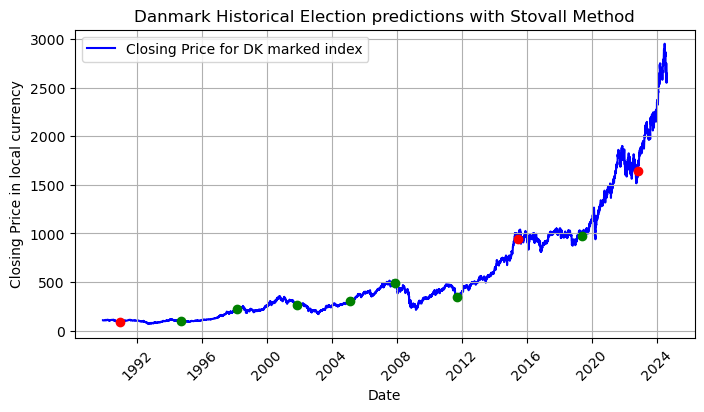

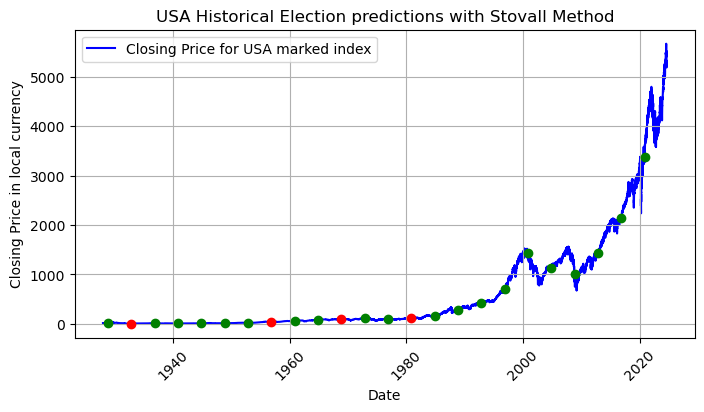

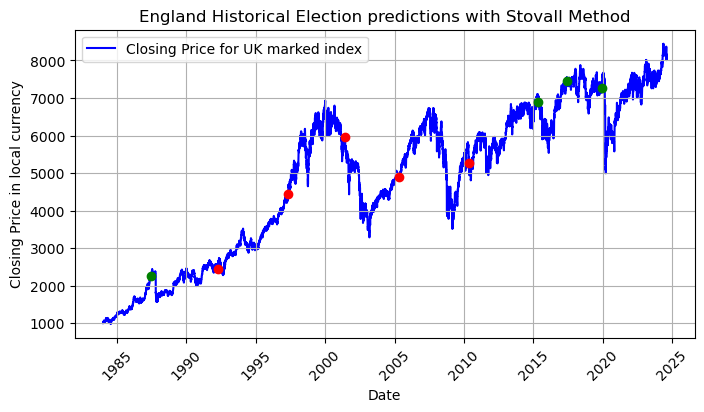

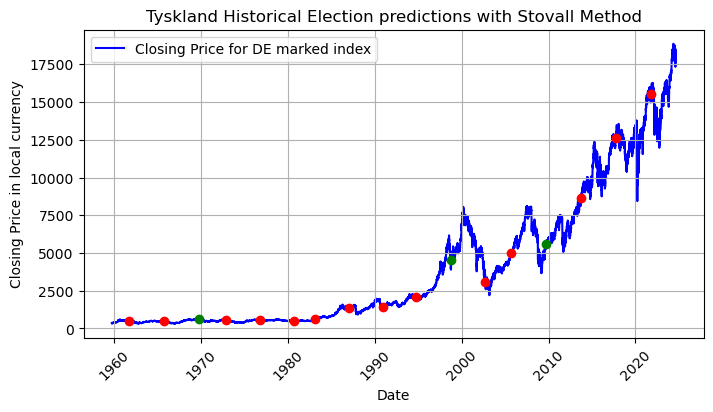

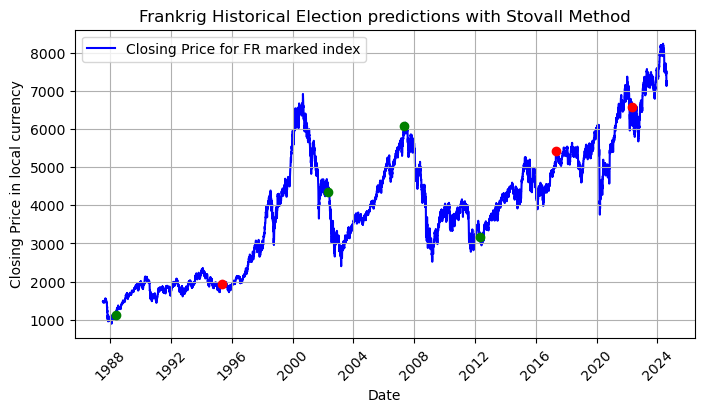

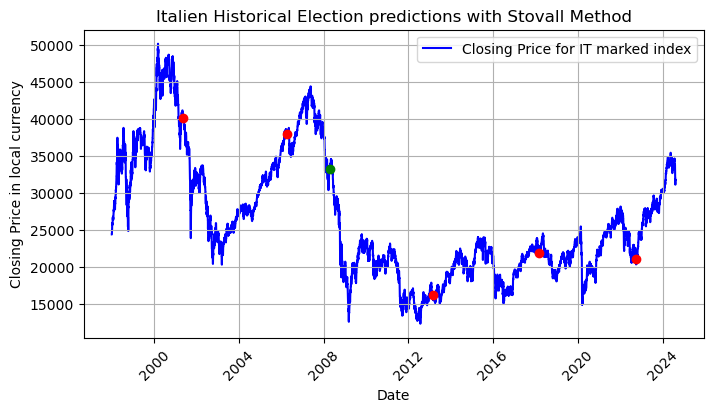

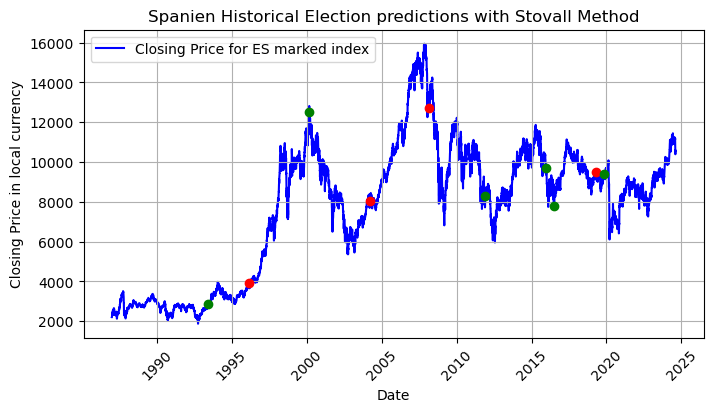

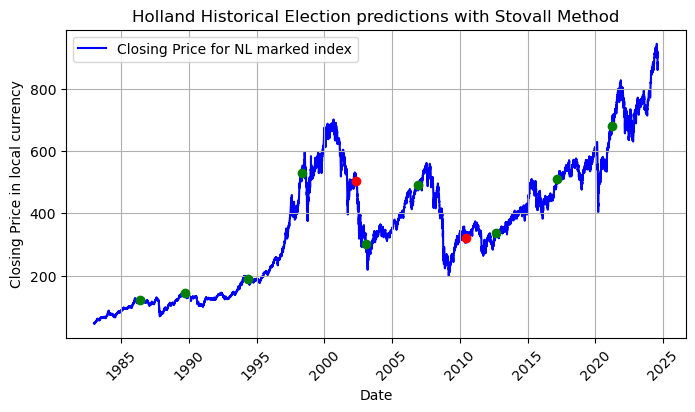

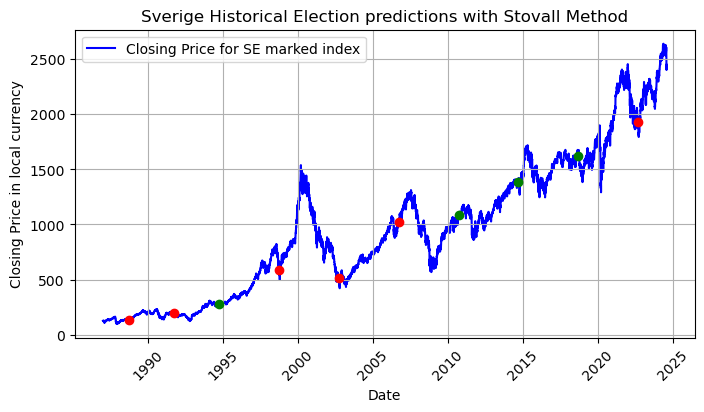

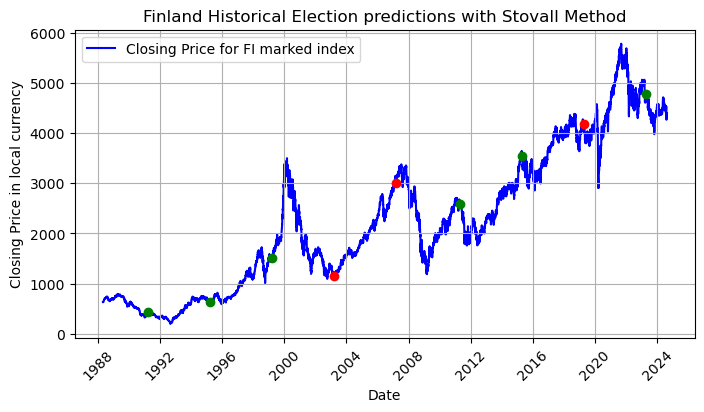

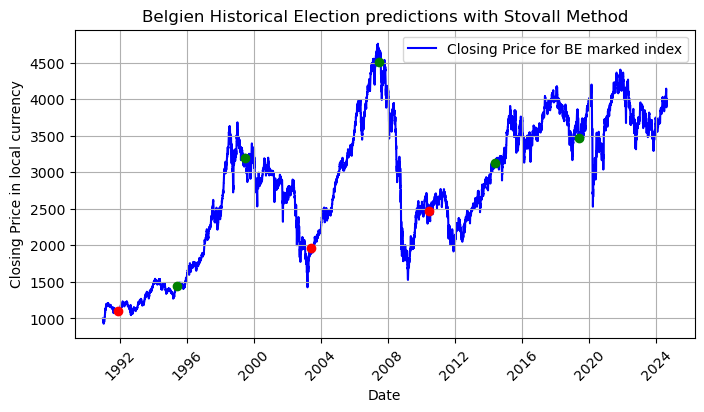

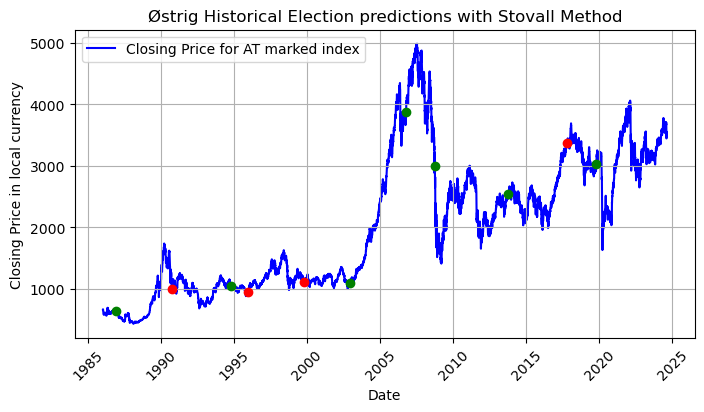

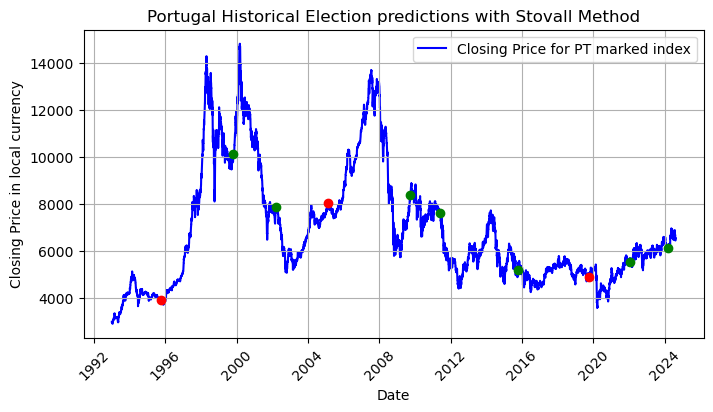

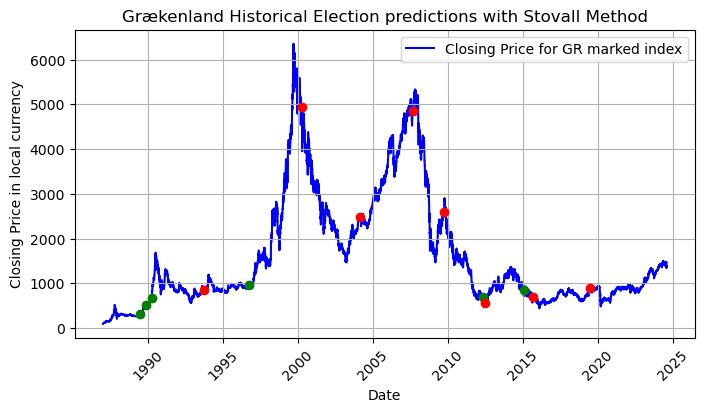

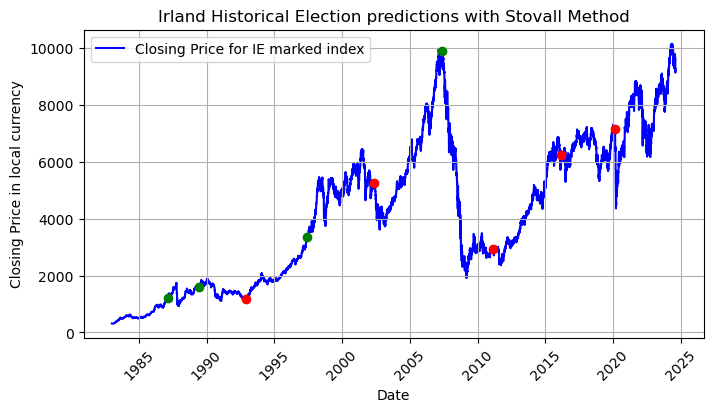

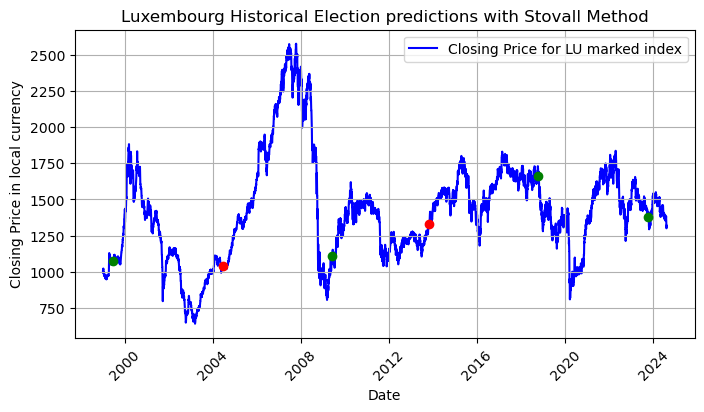

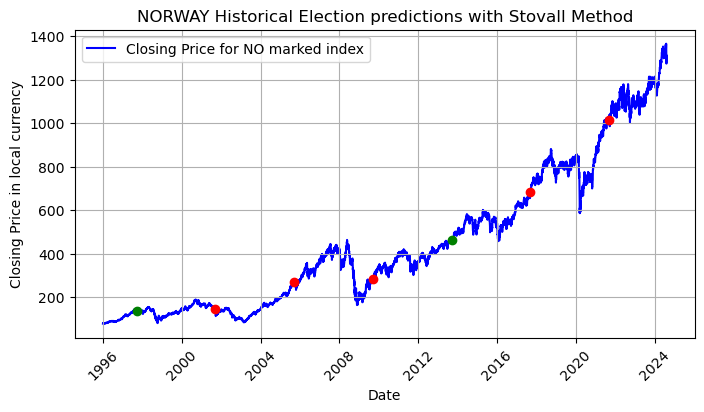

In [276]:
# Loop through the countries and plot the data for each
for abbrev, (country_name, election_dates, periods) in countries.items():
    data = globals()[abbrev]  # Get the DataFrame for the current country
    
    # Filter the data to start from the first available date after cleaning
    start_date = data['Dates'].min()
    data_filtered = data[data['Dates'] >= start_date]

    # Plotting the historical returns
    plt.figure(figsize=(8, 4))
    plt.plot(data_filtered['Dates'], data_filtered[country_name], label=f'Closing Price for {abbrev} marked index', color='blue', zorder=1)

    # Plot the Prediction_Stovall markers only on election dates
    election_data = data_filtered[data_filtered['Election']]  # Filter only election dates
    for index, row in election_data.iterrows():
        if row['Prediction_Stovall']:
            plt.scatter(row['Dates'], row[country_name], color='green', marker='o', zorder=2, label='Correct Prediction' if index == 0 else "")
        else:
            plt.scatter(row['Dates'], row[country_name], color='red', marker='o', zorder=2, label='Incorrect Prediction' if index == 0 else "")

    # Adding titles and labels
    plt.title(f'{country_name} Historical Election predictions with Stovall Method')
    plt.xlabel('Date')
    plt.ylabel('Closing Price in local currency')

    # Formatting the date on the x-axis for better readability
    plt.xticks(rotation=45)

    # Adding a grid
    plt.grid(True)

    # Display the legend
    plt.legend()

    # Show the plot
    plt.show()


Accuracy

In [277]:
# Initialize a dictionary to store the results
prediction_results = {}

# Initialize variables for EU totals
eu_true_total = 0
eu_total_count = 0
eu_nord_true_total = 0
eu_nord_total_count = 0

# Loop through the countries and count the 'True' and 'False' in 'Prediction_Stovall'
for abbrev, (country_name, election_dates, periods) in countries.items():
    data = globals()[abbrev]  # Get the DataFrame for the current country
    
    # Count the True and False values in the 'Prediction_Stovall' column
    true_count = data['Prediction_Stovall'].sum()
    total_count = data['Prediction_Stovall'].notna().sum()  # Count non-NaN values

    # Store the result in the dictionary
    prediction_results[abbrev] = (true_count, total_count)
    
    # Add to EU total if not NO or USA
    if abbrev not in ['NO', 'USA']:
        eu_true_total += true_count
        eu_total_count += total_count

    # Add to EU total if not NO or USA
    if abbrev in ['DK', 'SE', 'FI']:
        eu_nord_true_total += true_count
        eu_nord_total_count += total_count

# Add EU_total to the results
prediction_results['EU_total'] = (eu_true_total, eu_total_count)
prediction_results['EU_Nord'] = (eu_nord_true_total, eu_nord_total_count)

# Display the results
for abbrev, (true_count, total_count) in prediction_results.items():
    print(f"{true_count}/{total_count} For {abbrev}")


7/10 For DK
20/24 For USA
4/9 For UK
3/17 For DE
4/7 For FR
1/6 For IT
6/10 For ES
9/11 For NL
4/10 For SE
6/9 For FI
5/8 For BE
7/11 For AT
7/10 For PT
6/14 For GR
4/9 For IE
4/6 For LU
2/7 For NO
77/147 For EU_total
17/29 For EU_Nord
